# Pre- & Post- Acceptance Conditions

In [94]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [95]:
# Initialization
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import matplotlib.table as tbl
plt.style.use('seaborn-darkgrid')

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot

## Which subjects are going to be looke at?
__Completed
__Exp Incomplete

In [96]:
# setting the path to the qualitative data master list
Qualitative_Path = ("N:\Shabnam Haghzare\\01- AV_OA_Study\\Master_Data_List\\Qualitative\\")

# reading the demographic data into a dataframe--- index = participant ID, colums = feature label
Demographics = pd.read_excel(Qualitative_Path + "Demographics.xlsx", sheet_name = "Master Data")
Demographics = Demographics.set_index('Participant ID')

status = Demographics.groupby('Participant Status')

completed_IDs = np.array(status.groups['All Completed'])
ss_incompleted_IDs = np.array(status.groups['Exp Incomplete'])
CIC_IDs = np.sort(np.concatenate((completed_IDs, ss_incompleted_IDs))) # CIC = Complete and incomplete IDs

In [97]:
CIC_IDs

array([ 2.,  4.,  5.,  6.,  7.,  9., 10., 11., 12., 14., 15., 16., 18.,
       24.])

## Reading ACC Scores

In [98]:
# setting the path to the qualitative data master list
Qualitative_Path = ("N:\Shabnam Haghzare\\01- AV_OA_Data\\Master_Data_List\\Qualitative\\")

def read_acc_questionnaire(excel, worksheet):
    df = pd.read_excel(Qualitative_Path + excel + ".xlsx", sheet_name = worksheet)
    df.columns = df.loc[0,:]
    df.drop(index = 0)
    df = df.set_index('Participant ID')
    df = df.drop(index = 'Participant ID')
    
    ## Looking only into the ones picked for analysis
#    Analyzed_IDs_2 = np.sort(np.concatenate((completed_IDs, ss_incompleted_IDs)))
#    Analyzed_df = df.loc[Analyzed_IDs_2].dropna()
    
    return df#, Analyzed_df

# reading the acceptance masterlist into a dataframe--- index = participant ID, colums = feature label
ACC_master= read_acc_questionnaire("AcceptabilityQuestionnaires", "Acceptability_MasterList")
#, Analyzed_ACC_master 
# Pre-exposure acceptability questionnaire
ACC_PRE      = read_acc_questionnaire("AcceptabilityQuestionnaires", "PRE")
#, Analyzed_ACC_PRE 
# Post exposure acceptability questionnaire
ACC_POST   = read_acc_questionnaire("AcceptabilityQuestionnaires", "POST")
#, Analyzed_ACC_POST  

### Pre-Comfort

In [141]:
pre_comfort = ACC_PRE.loc[CIC_IDs][['No Automation Comfort', 'Emergency Only Comfort', 'Help Driver Comfort',
                           'Partial Autonomy Comfort', 'Full Autonomy Comfort']]
#pre_comfort['Pre/Post'] = "Pre"
pre_comfort

,No Automation Comfort,Emergency Only Comfort,Help Driver Comfort,Partial Autonomy Comfort,Full Autonomy Comfort
Participant ID,,,,,
2,5,1,3,2,4
4,4,5,3,2,1
5,5,4,4,2,1
6,4,4,4,3,3
7,5,5,3,4,5
9,5,4,3,2,1
10,4,1,1,1,1
11,5,4,5,2,1
12,4,3,4,4,1


### Post comfort

In [100]:
help_df = ACC_POST.loc[CIC_IDs]
help_df.drop(help_df.loc[help_df["Status"] == "No Data Available"].index, inplace= True) # deleting those whose status in not 

post_comfort = help_df[['No Automation Comfort', 'Emergency Only Comfort', 'Help Driver Comfort',
                              'Partial Autonomy Comfort', 'Full Autonomy Comfort']]
#post_comfort['Pre/Post'] = "Post"
post_comfort

,No Automation Comfort,Emergency Only Comfort,Help Driver Comfort,Partial Autonomy Comfort,Full Autonomy Comfort
Participant ID,,,,,
4,4,5,3,2,1
7,4,5,5,4,5
9,3,4,5,1,2
10,4,3,5,3,5
11,5,3,4,2,2
12,4,3,3,4,4
15,5,5,5,4,3
16,5,4,5,1,1
18,5,2,2,4,2


In [139]:
difference = (post_comfort - pre_comfort).dropna()
difference 

,No Automation Comfort,Emergency Only Comfort,Help Driver Comfort,Partial Autonomy Comfort,Full Autonomy Comfort
Participant ID,,,,,
4,0,0,0,0,0
7,-1,0,2,0,0
9,-2,0,2,-1,1
10,0,2,4,2,4
11,0,-1,-1,0,1
12,0,0,-1,0,3
15,0,0,1,1,0
16,0,-1,0,-1,0
18,0,-3,-1,2,0


In [124]:
counts = pd.DataFrame()
counts['Changed for Worse'] = (difference < 0).sum(axis = 0)*100/len(difference)
counts['No Change of Opinion'] = (difference == 0).sum(axis = 0)*100/len(difference)
counts['Changed for Better'] = (difference > 0).sum(axis = 0)*100/len(difference)

counts

,Changed for Worse,No Change of Opinion,Changed for Better
0,,,
No Automation Comfort,22.222222,77.777778,0.000000
Emergency Only Comfort,33.333333,55.555556,11.111111
Help Driver Comfort,33.333333,22.222222,44.444444
Partial Autonomy Comfort,22.222222,44.444444,33.333333
Full Autonomy Comfort,0.000000,55.555556,44.444444


Text(0.5, 0, 'Percentage of Participants (%)')

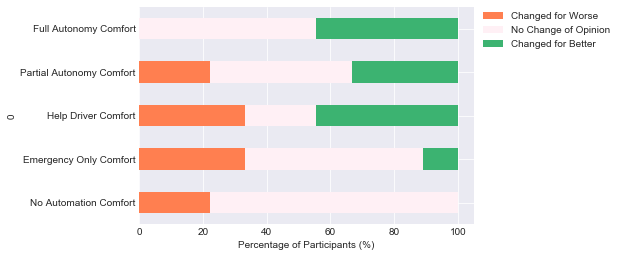

In [138]:
my_pal = ['coral',"lavenderblush", 'mediumseagreen']

counts.plot.barh(stacked=True, color = my_pal); 
plt.legend(bbox_to_anchor=(1, 1.02)); plt.xlabel("Percentage of Participants (%)")